# MODELADO UTILIZANDO RANDOM FOREST MULTI-OUTPUT 

## CON SUBSAMPLING PARA REDUCIR EL NUMERO DE ROWS

Referencia sub-sampling:
https://www.kdnuggets.com/2019/05/sample-huge-dataset-machine-learning.html

Referencia Multi Output Decision Tree Regression:
* https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression_multioutput.html
* https://scikit-learn.org/stable/auto_examples/ensemble/plot_random_forest_regression_multioutput.html

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

In [2]:
#Ubicamos el dataset
#path = "Z:\MASTER INT. ARTIFICIAL\TFM_DATA\CLEANDATA\\" # Path PC Desktop en casa
#path = "U:\MASTER INT. ARTIFICIAL\TFM_DATA\CLEANDATA\\" # Path Laptop en casa
path = "F:\\DATA_TFM\\CLEANDATA\\" #Path PC Desktop en el trabajo
archivo = "dataset_completo.csv"

In [3]:
#Código que puede servir para generar aleatoriamente los indices
#de las filas a recuperar para el datset, pero no lo aplicare, utilicare sample de dataframe
#este código tiene problemas con el parametro usecols.
"""import random
random.seed(10)

n= 63520301 #Líneas en el dataset completo
n1=  100000 #Líneas a obtener para nuestro sampling
skip_list = sorted(random.sample(range(n),(n-n1)))
print(min(skip_list),max(skip_list))
len(skip_list)"""

'import random\nrandom.seed(10)\n\nn= 63520301 #Líneas en el dataset completo\nn1=  100000 #Líneas a obtener para nuestro sampling\nskip_list = sorted(random.sample(range(n),(n-n1)))\nprint(min(skip_list),max(skip_list))\nlen(skip_list)'

In [4]:
#Cargamos el dataset y leemos todo, para despues hacer sumsampling
raw_dataset = pd.read_csv(path+archivo, usecols=['lin_det', 'piso_det', 'mód_opt', 'X\'', 'Y\'', 'Z\'', 'azimut', 'zenit',
                                             'tiempo', 't_selp', 'amp', 'frec_hits', 'aafit_azimut', 'aafit_zenit',
                                             'aafit_lambda', 'aafit_beta', 'bbfit_azimut', 'bbfit_zenit',
                                             'bbfit_quality', 'muon_azimut', 'muon_zenit'])#,nrows=1000)

In [5]:
#Realizamos el subsampling con n líneas
n=10000
dataset = raw_dataset.sample(n)
dataset.tail()
#Para liberar la memoria ya que en mi equipo de 32GB casi se la acaba toda, y en la lap y Desktop \
#de casa se vuelve imposible el trabajar
del raw_dataset 

C:\Users\Marco\Anaconda3\envs\tf_gpu\lib\site-packages\IPython\core\interactiveshell.py:3296: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


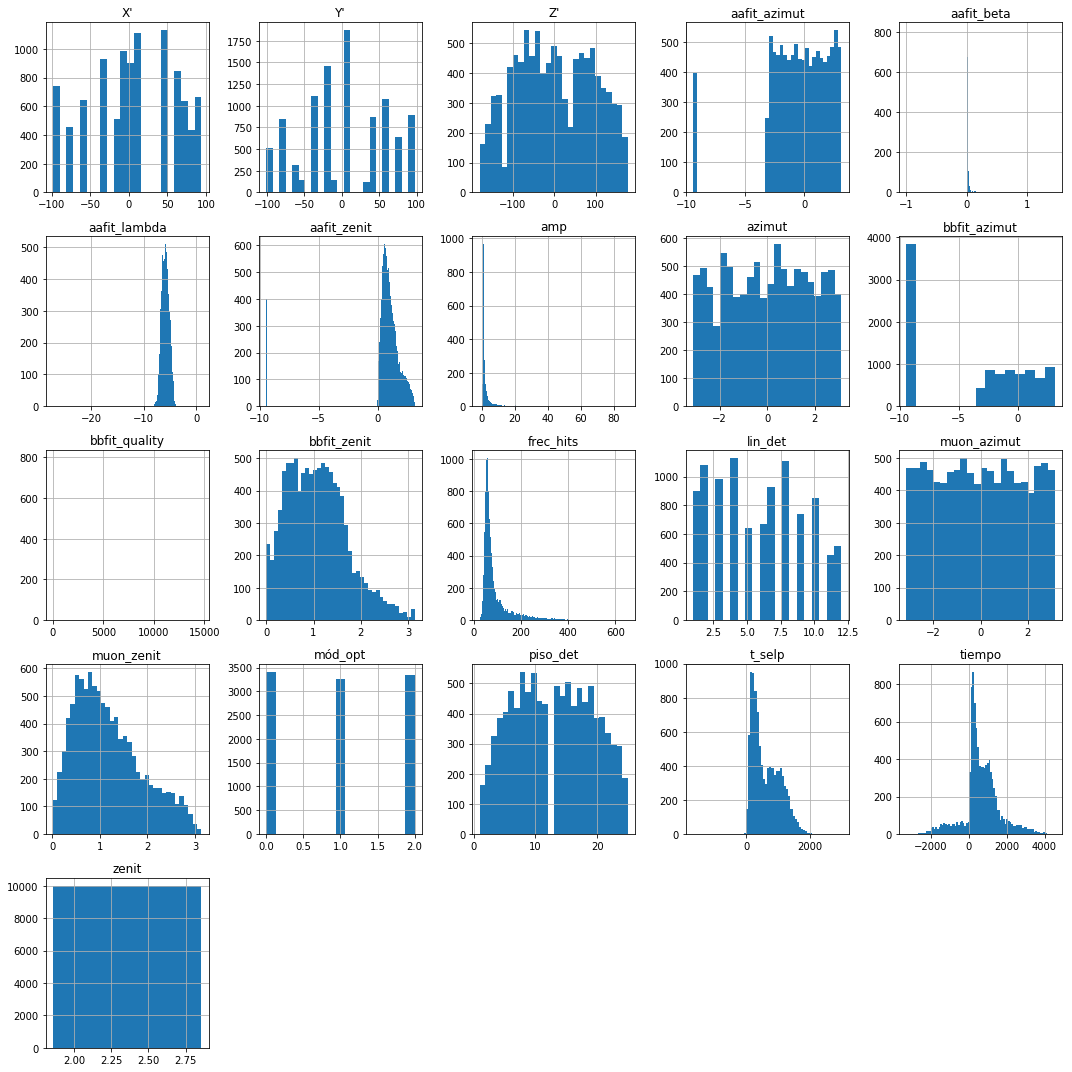

In [6]:
#Graficamos los histogramas de cada variable.
fig = plt.figure(figsize= (15,15))
ax = fig.gca()
dataset.hist(ax=ax,bins='auto')
plt.tight_layout()
plt.show()

In [7]:
### DIVISION DE LA DATA EN TRAIN Y TEST PARA VALIDACIÓN HOLD-OUT INICIAL
X = dataset.iloc[:,:19]; Y = dataset.iloc[:,19:21]
#X_values = X.values; Y_values = Y.values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

train_dataset = X_train
test_dataset = X_test
train_labels = Y_train
test_labels = Y_test

In [8]:
train_dataset.describe().transpose()

count        mean           std          min         25%  \
lin_det        7000.0    5.952857  3.311008e+00     1.000000    3.000000   
piso_det       7000.0   12.965286  6.452156e+00     1.000000    8.000000   
mód_opt        7000.0    0.986429  8.277677e-01     0.000000    0.000000   
X'             7000.0    7.469911  5.487218e+01   -98.410729  -35.478743   
Y'             7000.0    3.645242  5.551531e+01  -100.929594  -38.905038   
Z'             7000.0    1.931471  9.359114e+01  -180.034434  -69.797434   
azimut         7000.0    0.020568  1.783271e+00    -3.119675   -1.555375   
zenit          7000.0    2.356193  4.441209e-16     2.356193    2.356193   
tiempo         7000.0  658.522035  9.643743e+02 -3282.860653  214.795977   
t_selp         7000.0  629.428543  4.397264e+02 -1663.768139  249.551903   
amp            7000.0    2.292797  3.764625e+00    -1.393891    0.833672   
frec_hits      7000.0   90.884557  6.340746e+01    25.558472   55.289269   
aafit_azimut   7000.0   -0.405127  2.592499e+00    -9.424778   -1.864502   
aafit_zenit    7000.0    0.646697  2.164073e+00    -9.424778    0.522881   
aafit_lambda   7000.0   -5.588236  1.579575e+00   -27.291283   -6.356809   
aafit_beta     7000.0   -0.019326  2.067373e-01    -1.000000    0.006893   
bbfit_azimut   7000.0   -3.636319  4.812046e+00    -9.424778   -9.424778   
bbfit_zenit    7000.0    1.084588  6.291687e-01     0.000000    0.584541   
bbfit_quality  7000.0   13.429193  2.688857e+02     0.217337    1.327214   

                      50%          75%           max  
lin_det          6.000000     9.000000     12.000000  
piso_det        13.000000    18.000000     25.000000  
mód_opt          1.000000     2.000000      2.000000  
X'               4.809304    59.677021     93.934807  
Y'               8.648666    56.758717     97.285109  
Z'               3.056566    76.214566    177.946108  
azimut           0.124845     1.555163      3.128265  
zenit            2.356193     2.356193      2.356193  
tiempo         547.886567  1139.951957   4536.603299  
t_selp         511.729143   977.330056   2983.967853  
amp              1.144654     2.018781     88.418644  
frec_hits       66.070557    97.112656    653.133392  
aafit_azimut    -0.171635     1.524545      3.141556  
aafit_zenit      0.891714     1.425694      3.116272  
aafit_lambda    -5.830718    -5.255201      1.000000  
aafit_beta       0.011073     0.019911      1.449666  
bbfit_azimut    -2.036863     0.583832      3.137994  
bbfit_zenit      1.038594     1.481512      3.141544  
bbfit_quality    2.208953     3.928817  14705.671125

In [9]:
train_labels.describe().transpose()

count      mean       std       min       25%       50%  \
muon_azimut  7000.0 -0.036600  1.828853 -3.139186 -1.633002 -0.031651   
muon_zenit   7000.0  1.183862  0.699597  0.024129  0.628617  1.054918   

                  75%       max  
muon_azimut  1.534283  3.140047  
muon_zenit   1.620762  3.131612

In [10]:
test_dataset.describe().transpose()

count        mean         std          min         25%  \
lin_det        3000.0    5.937667    3.294652     1.000000    3.000000   
piso_det       3000.0   12.870667    6.363550     1.000000    8.000000   
mód_opt        3000.0    1.010000    0.806298     0.000000    0.000000   
X'             3000.0    5.225331   54.729884   -98.410729  -35.964729   
Y'             3000.0    4.718499   55.613587  -101.027195  -38.857790   
Z'             3000.0    0.510051   92.383344  -180.031892  -69.825892   
azimut         3000.0    0.008073    1.801764    -3.119675   -1.555614   
zenit          3000.0    2.356193    0.000000     2.356193    2.356193   
tiempo         3000.0  663.077677  960.577529 -2580.252836  217.650497   
t_selp         3000.0  624.232244  429.633570 -1254.918504  257.913599   
amp            3000.0    2.360975    3.794624    -0.923447    0.838577   
frec_hits      3000.0   89.625715   58.918187    25.501251   55.255890   
aafit_azimut   3000.0   -0.312780    2.550730    -9.424778   -1.691505   
aafit_zenit    3000.0    0.669209    2.132586    -9.424778    0.517475   
aafit_lambda   3000.0   -5.563658    1.505753   -12.193534   -6.342059   
aafit_beta     3000.0   -0.018551    0.200950    -1.000000    0.006729   
bbfit_azimut   3000.0   -3.546542    4.792619    -9.424778   -9.424778   
bbfit_zenit    3000.0    1.086284    0.632501     0.000001    0.580342   
bbfit_quality  3000.0   10.529803  149.647573     0.184747    1.298539   

                      50%          75%          max  
lin_det          6.000000     9.000000    12.000000  
piso_det        13.000000    18.000000    25.000000  
mód_opt          1.000000     2.000000     2.000000  
X'               4.665254    45.533955    93.934655  
Y'               8.929462    56.880374    97.285109  
Z'               2.862566    75.658202   177.946108  
azimut           0.112739     1.556294     3.128265  
zenit            2.356193     2.356193     2.356193  
tiempo         551.827976  1113.703528  4199.969765  
t_selp         501.854046   967.544417  2262.007309  
amp              1.147282     2.112758    42.971425  
frec_hits       67.090988    97.379684   393.638611  
aafit_azimut    -0.101494     1.569755     3.140850  
aafit_zenit      0.878559     1.410588     3.065982  
aafit_lambda    -5.795393    -5.214769     1.000000  
aafit_beta       0.010809     0.018846     0.869960  
bbfit_azimut    -1.936539     0.642982     3.138197  
bbfit_zenit      1.036495     1.490852     3.141581  
bbfit_quality    2.122342     3.745905  7100.410429

In [11]:
test_labels.describe().transpose()

count      mean       std       min       25%       50%  \
muon_azimut  3000.0  0.026322  1.796706 -3.140872 -1.460894 -0.010511   
muon_zenit   3000.0  1.187242  0.708025  0.017236  0.632149  1.055808   

                  75%       max  
muon_azimut  1.545718  3.138776  
muon_zenit   1.640592  3.081798

In [39]:
### BORRRAR PORQUE QUEREMOS RANDOM FOREST MULTIOUTPUT NO SOLO UN ARBOL (DECISSION TREE)

def mo_dtr(md,rs):
    modelo_motr = DecisionTreeRegressor(max_depth=md, random_state=rs)
    modelo_motr.fit(X_train, Y_train)
    return(modelo_motr)

In [48]:
#Construyendo el modelo de tipo Multi Output - Random Forest Decission Tree, y estableciendo los hiper-parámetros

#Esta función devuelve el modelo y las predicciones
def morfr(ests,md,rs):
    model = MultiOutputRegressor(RandomForestRegressor(n_estimators=ests, max_depth=md,random_state=rs))
    model.fit(X_train,Y_train)
    preds = model.predict(X_test)
    return(preds, model)

In [110]:
y_predict,modelo = morfr(20,20,10)

In [111]:
#Comparando algunas predicciones vs valores reales
templist1 = []
print("Valores Predichos")
print(y_predict[0:5])
#print(pd.DataFrame(templist1).transpose())
print("Valores Reales")
print(Y_test.iloc[0:5].values)

Valores Predichos
[[-1.06072096  2.68233879]
 [ 0.4053307   0.51316223]
 [ 0.98651722  2.00681595]
 [-0.30072549  0.94741072]
 [ 1.17804977  0.37538597]]
Valores Reales
[[-0.92685615  2.91602735]
 [ 3.11868943  0.53429058]
 [ 0.2751213   2.16958796]
 [-0.38942785  0.81342039]
 [ 1.0802371   0.36307464]]


In [114]:
#Obteniendo algunas métricas importantes utilizando las funciones de scikit learn
from sklearn.metrics import mean_absolute_error, max_error, mean_squared_error
import numpy as np

def metricas(y_true,y_predict):
    mae = mean_absolute_error(y_true,y_predict)
    mse = mean_squared_error(y_true,y_predict)
    rmse = np.sqrt(mse)
    maxe= max_error(y_true,y_predict)
    mape = np.mean(np.abs((y_true-y_predict)/y_true)) * 100
    return(mae,mse,rmse,mape,maxe)

mae_maz,mse_maz,rmse_maz,mape_maz,maxe_maz = metricas(Y_test.iloc[:,0],y_predict[:,0])
mae_mze,mse_mze,rmse_mze,mape_mze,maxe_mze = metricas(Y_test.iloc[:,1],y_predict[:,1])

row_maz = [mae_maz,mse_maz,rmse_maz,mape_maz,maxe_maz]
row_mze = [mae_mze,mse_mze,rmse_mze,mape_mze,maxe_mze]

data_errors = [row_maz,row_mze]

met_df = pd.DataFrame(data_errors, columns=['MAE','MSE','RMSE','MAPE','MAXE'])

print("\nMétricas de error, 0=Muon_Azimut, 1=Muon_Zenit")
met_df.transpose()


Métricas de error, 0=Muon_Azimut, 1=Muon_Zenit


0          1
MAE     0.831593   0.179187
MSE     1.740051   0.096594
RMSE    1.319110   0.310796
MAPE  104.588581  25.501386
MAXE    5.953199   2.203284

### Graficando la dispersión de los datos y la distribución del error para x numero de árboles

Referencias:
* https://matplotlib.org/users/tight_layout_guide.html
* https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html
* https://matplotlib.org/3.1.0/gallery/color/named_colors.html

In [155]:
#Definiendo la función para graficar y calcular el modelo con diferentes hiper parámetros
#Adicional se genera una lista con metricas para comparar posteriormente
def graf_morf(ests,dep,rs):
    y_predict, model = morfr(ests,dep,rs)
    #Calculando las métricas de errores para cada iteración y metiendolas a una lista para comparar resultados
    mae_maz,mse_maz,rmse_maz,mape_maz,maxe_maz = metricas(Y_test.iloc[:,0],y_predict[:,0]) #Calculo para azimut
    mae_mze,mse_mze,rmse_mze,mape_mze,maxe_mze = metricas(Y_test.iloc[:,1],y_predict[:,1]) #Calculo para zenit
    row_maz = ["Azimut",ests,dep,mae_maz,mse_maz,rmse_maz,mape_maz,maxe_maz]
    row_mze = ["Zenit",ests,dep,mae_mze,mse_mze,rmse_mze,mape_mze,maxe_mze]
    mets.append(row_maz);mets.append(row_mze)
    #Graficando la dispersión de las predicciones de la variable AZIMUT
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4), facecolor='papayawhip')
    fig.suptitle("DISPERSIONES DE AMBAS VARIABLES arboles= "+str(ests)+" depth= "+str(dep),size=18, y=1.05)
    ax1.set_title("Dispersión de las predicciones Muon-Azimut", size=15)
    ax1.set_xlabel('Valores Verdaderos'); ax1.set_ylabel('Predicciones') 
    ax1.scatter(Y_test.iloc[:,0],y_predict[:,0], c="springgreen",label="predicciones")
    _ = ax1.plot(Y_test.iloc[:,0],Y_test.iloc[:,0], c="red", label="recta real")
    ax1.legend()
    #Graficando la dispersión de las predicciones de la variable AZIMUT
    ax2.set_title("Dispersión de las predicciones Muon-Zenit", size=15)
    ax2.set_xlabel('Valores Verdaderos')
    ax2.set_ylabel('Predicciones')
    ax2.scatter(Y_test.iloc[:,1],y_predict[:,1], c="springgreen",label="predicciones")
    _ = ax2.plot(Y_test.iloc[:,1],Y_test.iloc[:,1], c="red", label="recta real")
    ax2.legend()
    plt.tight_layout()
    plt.show()

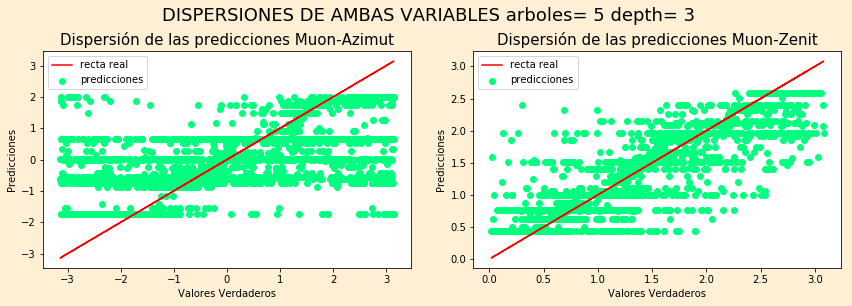

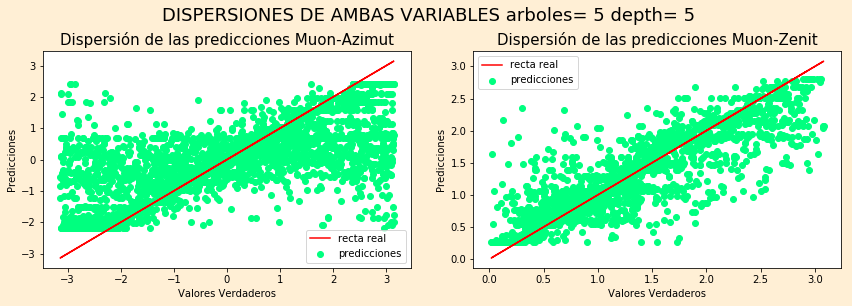

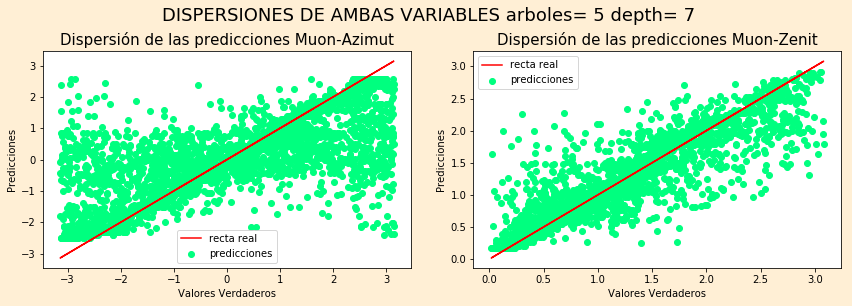

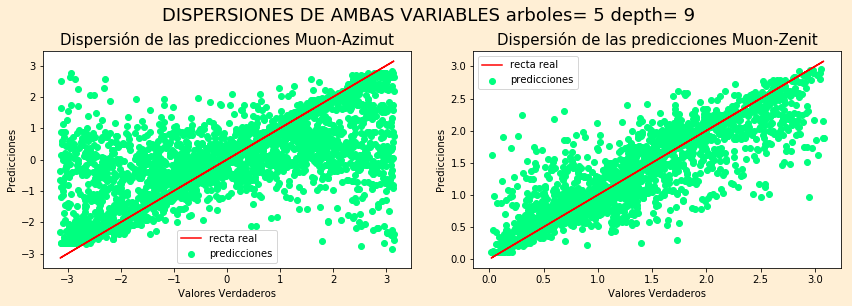

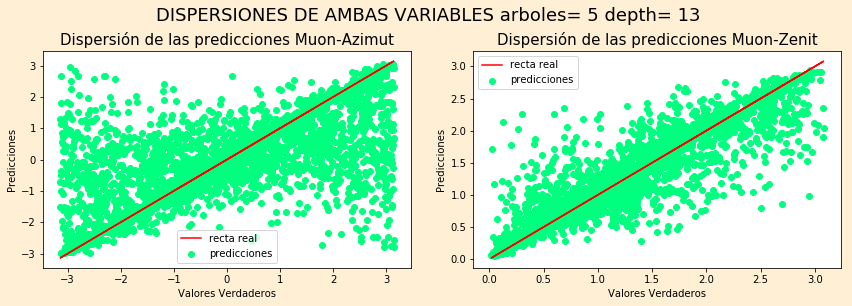

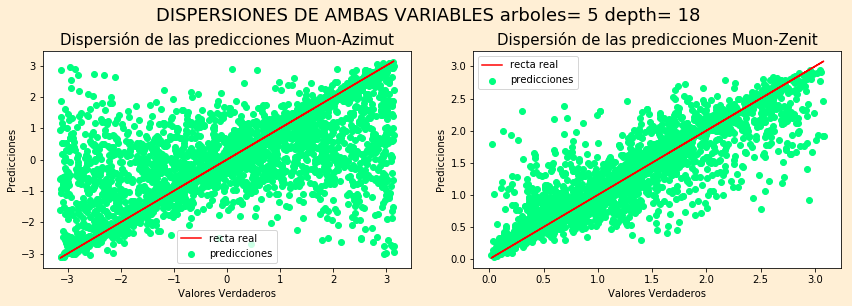

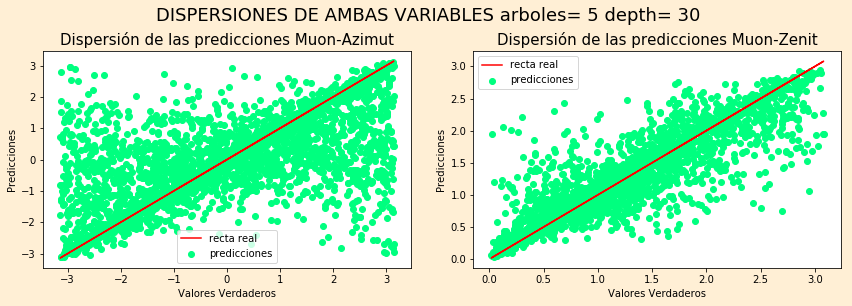

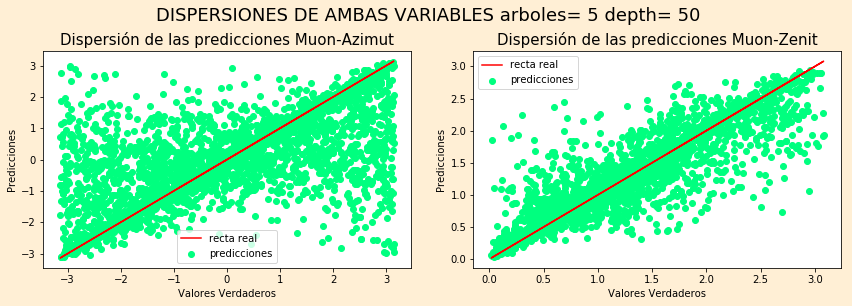

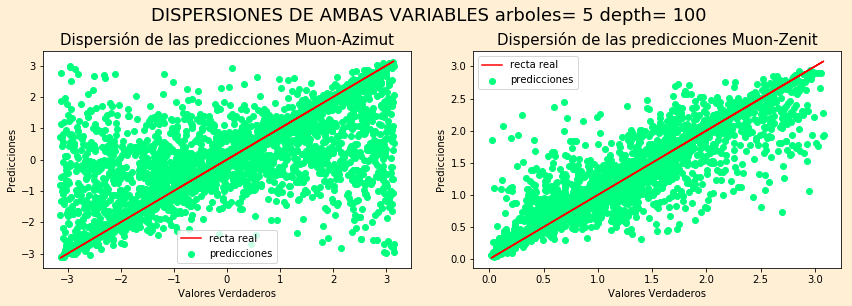

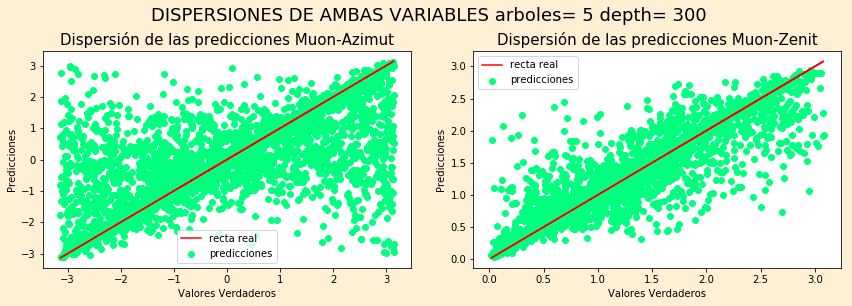

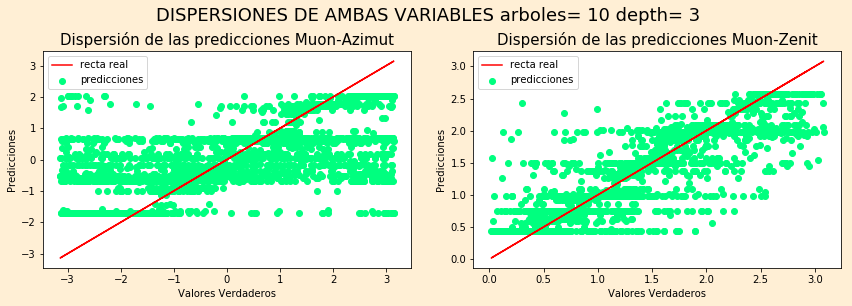

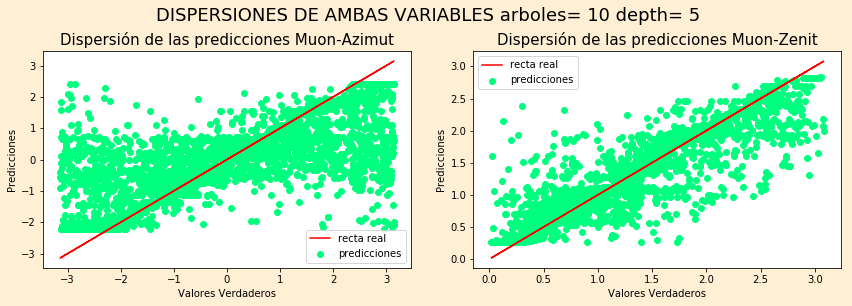

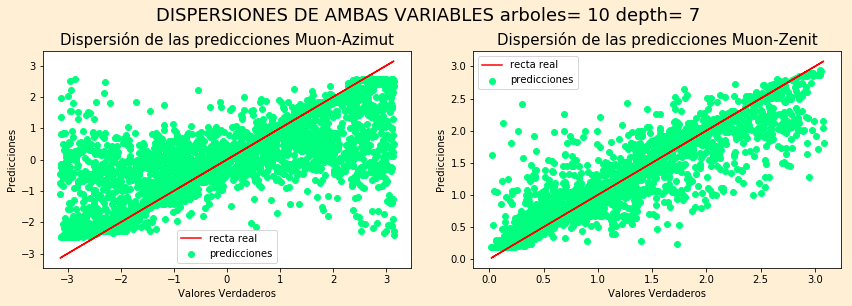

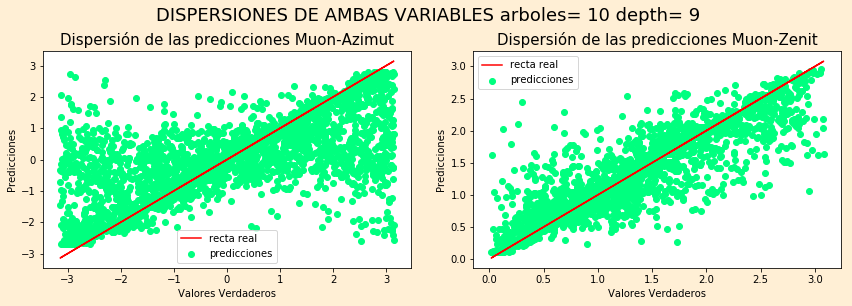

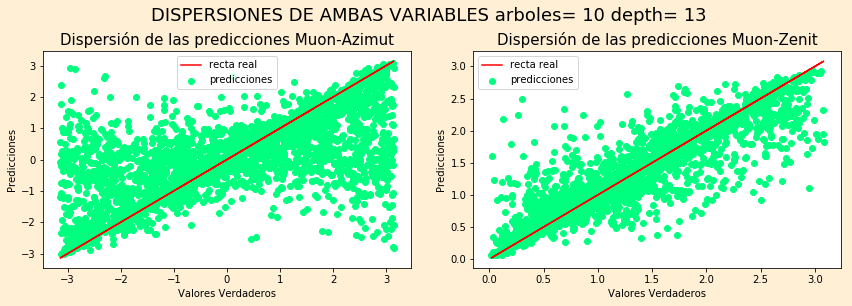

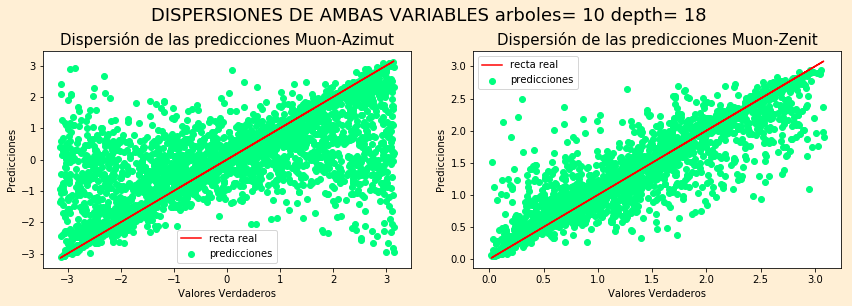

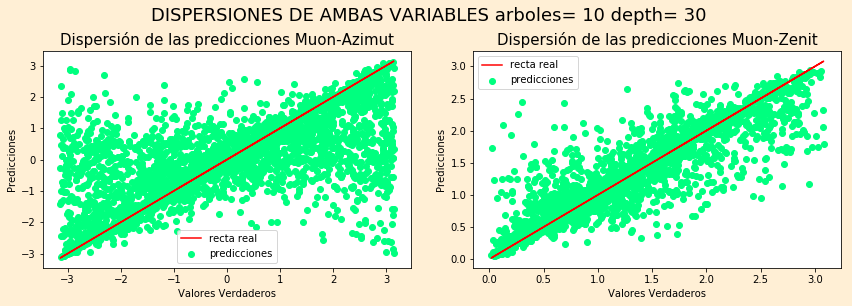

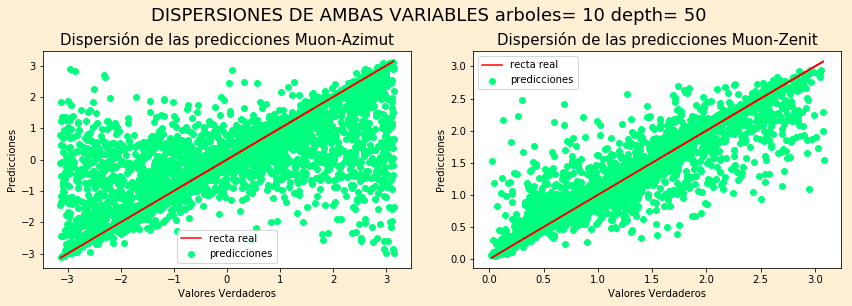

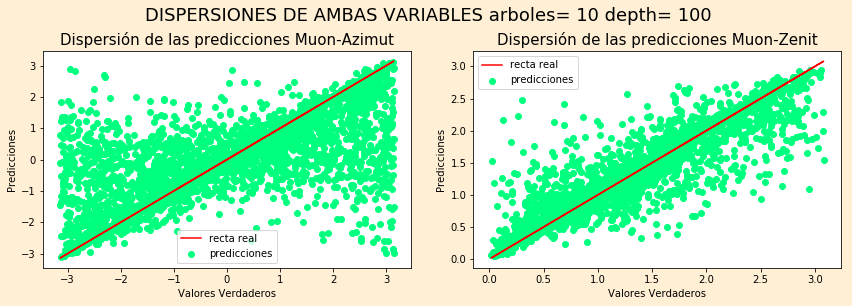

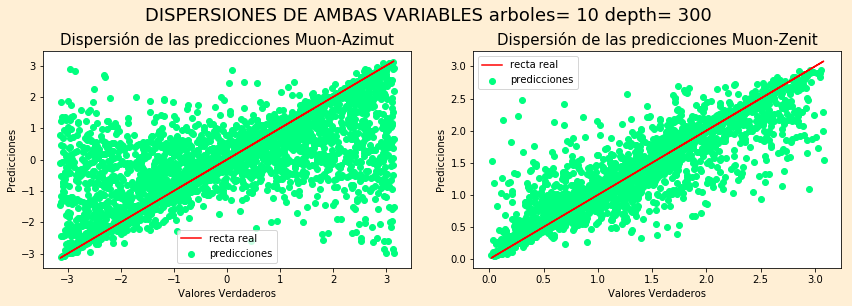

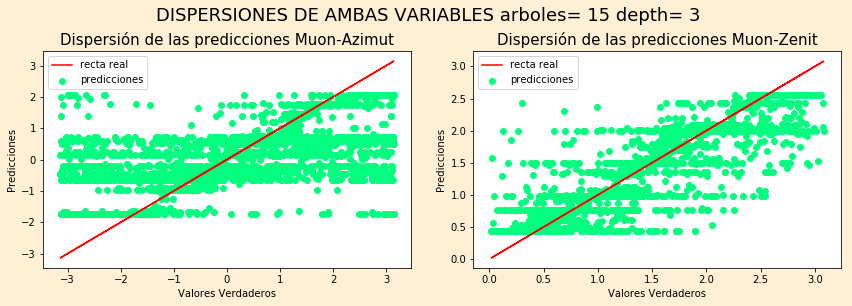

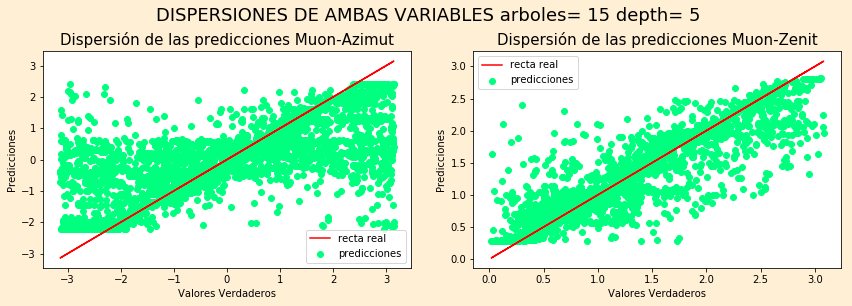

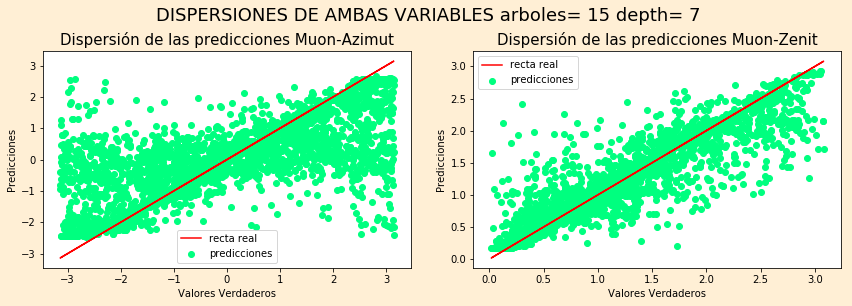

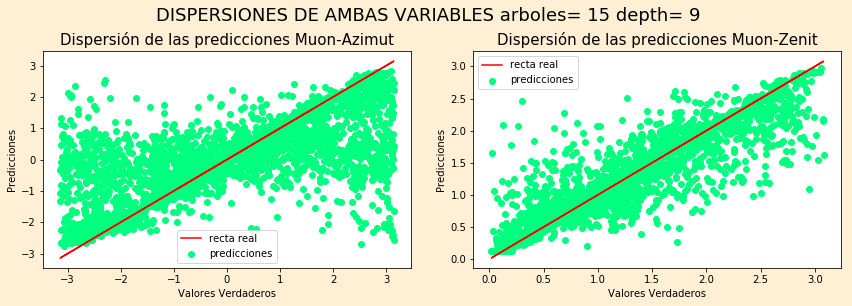

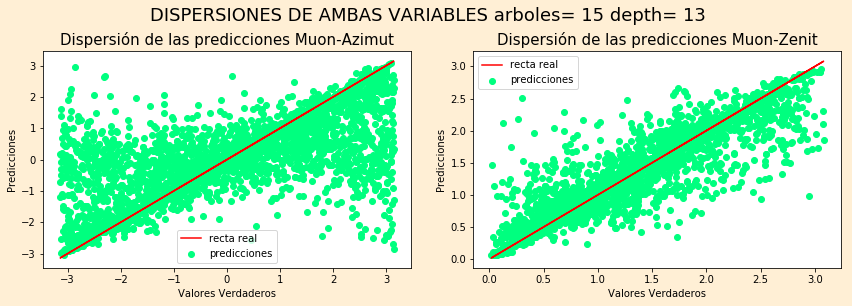

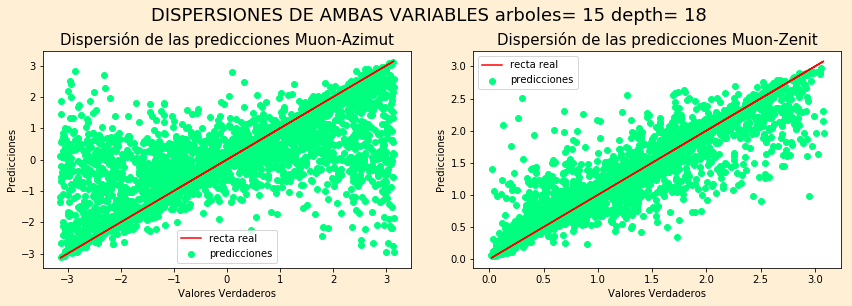

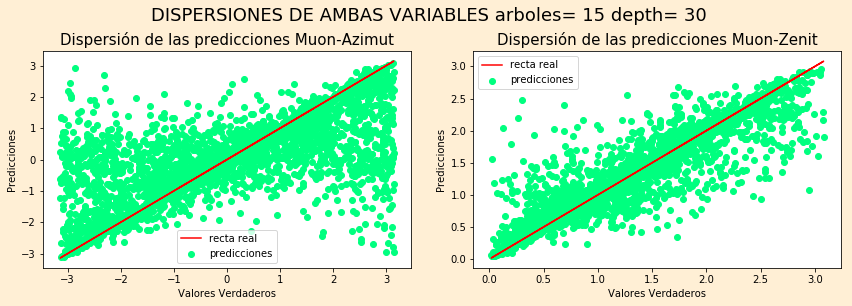

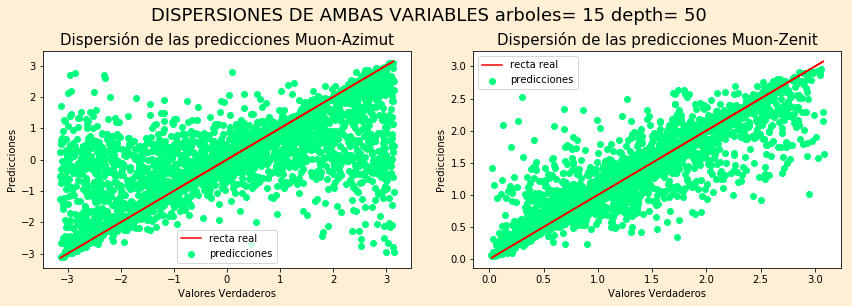

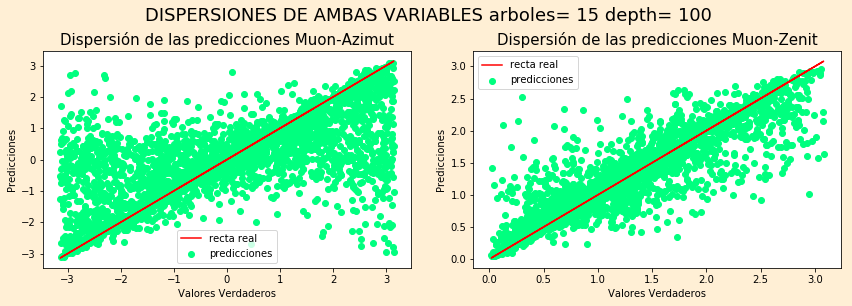

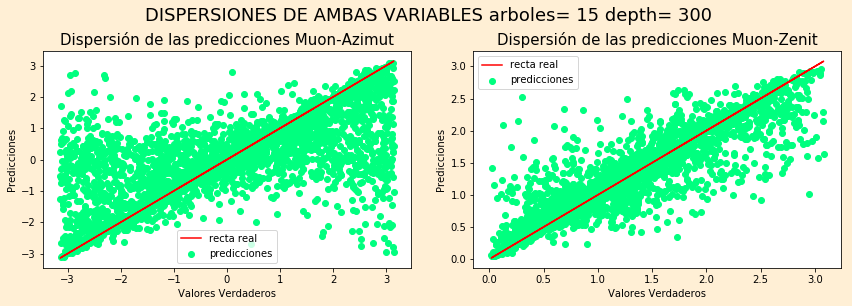

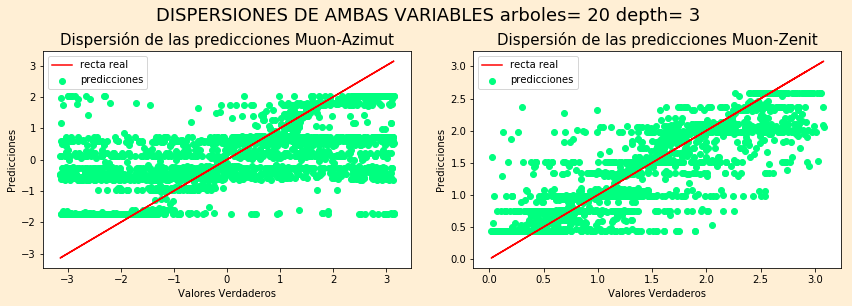

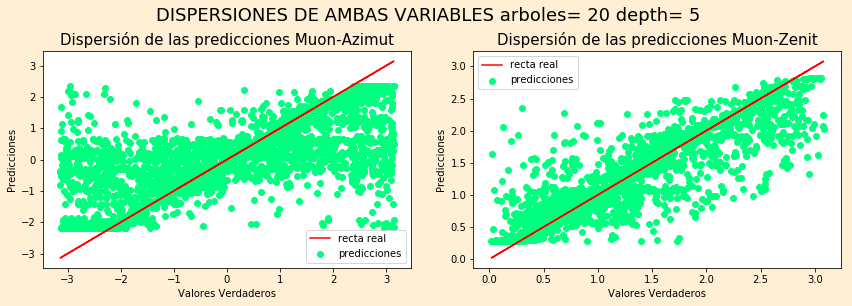

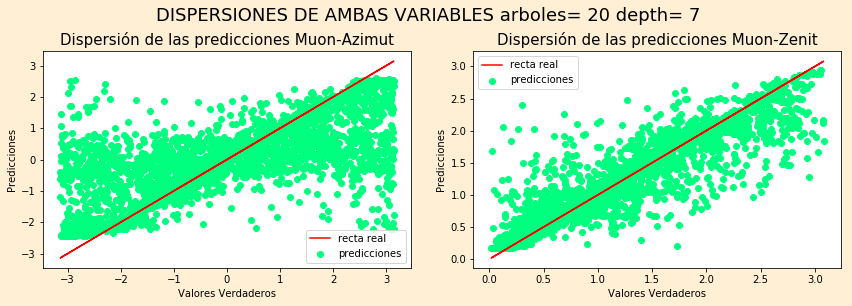

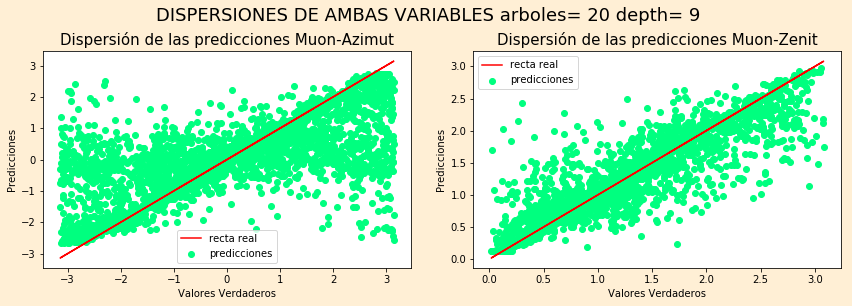

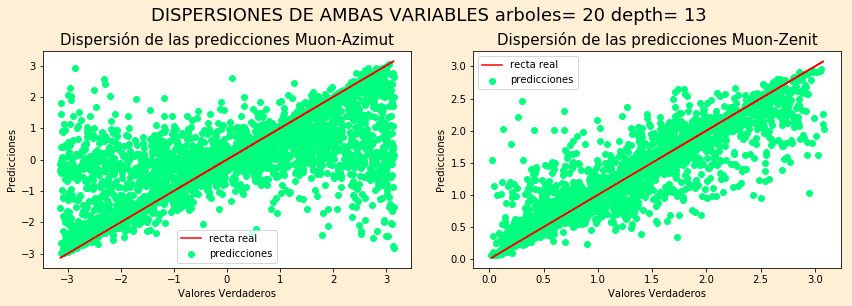

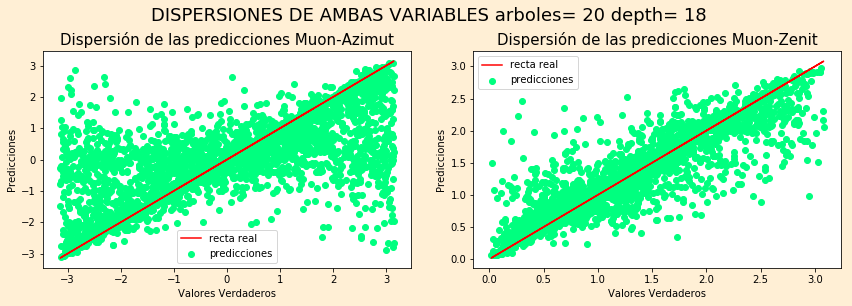

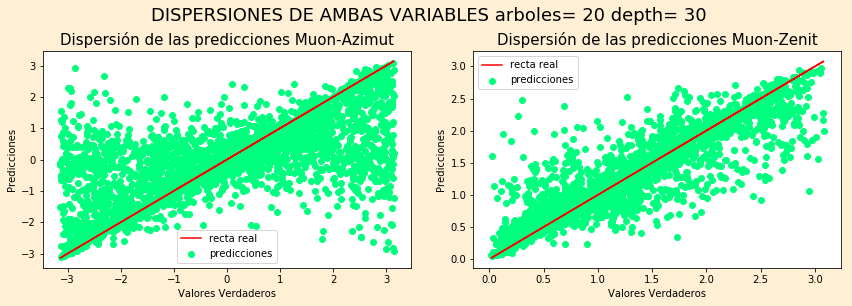

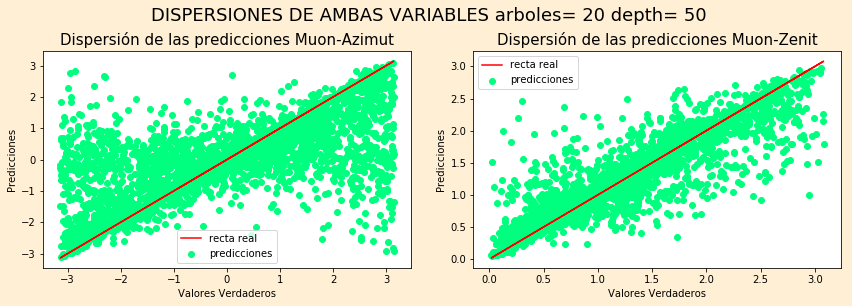

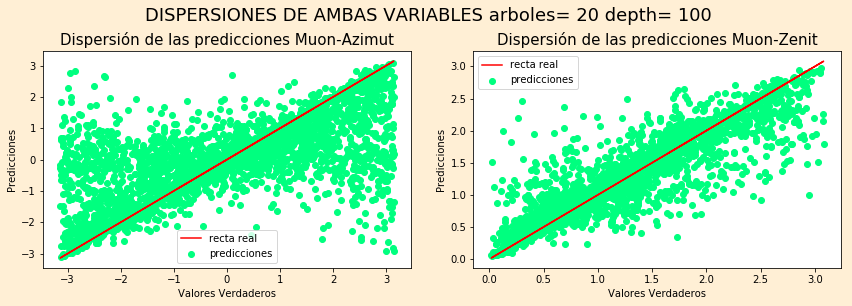

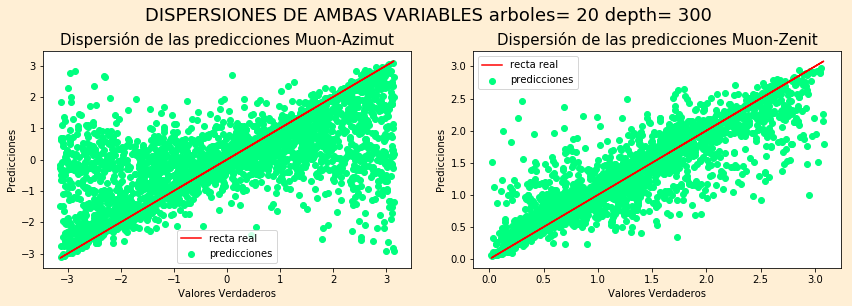

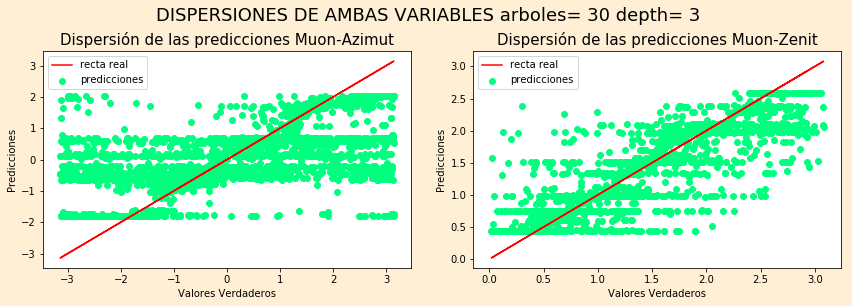

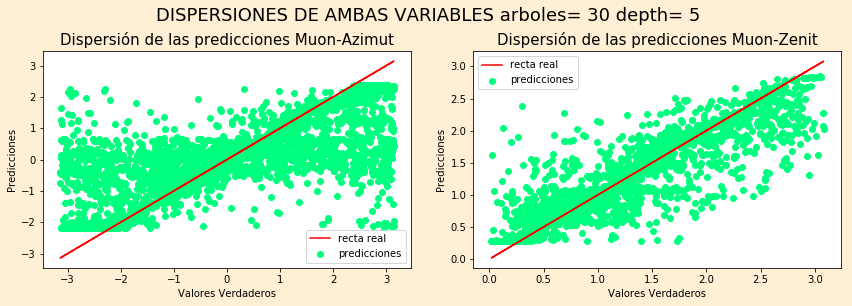

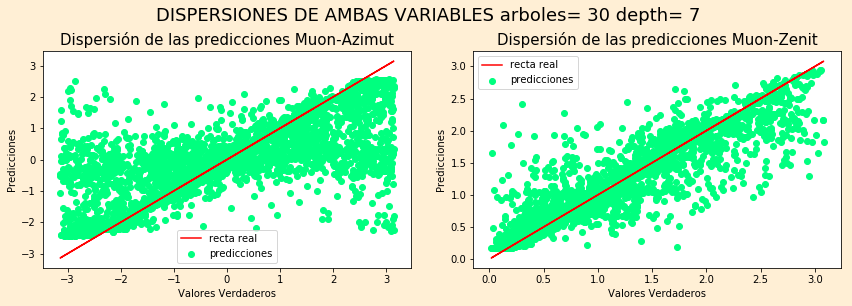

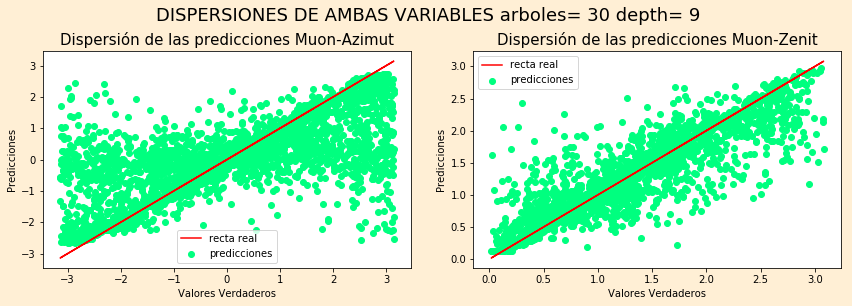

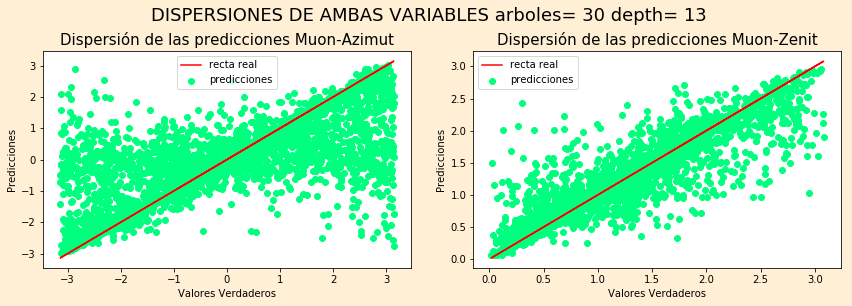

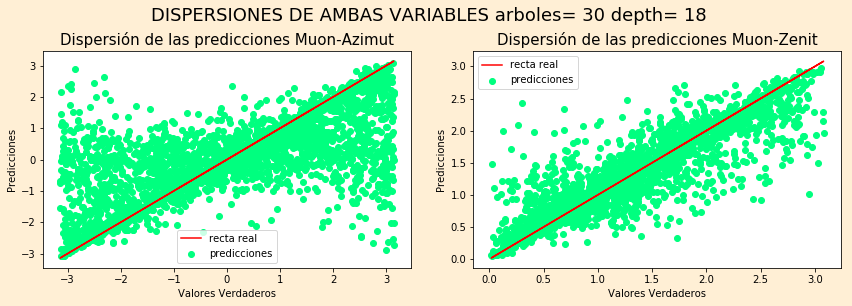

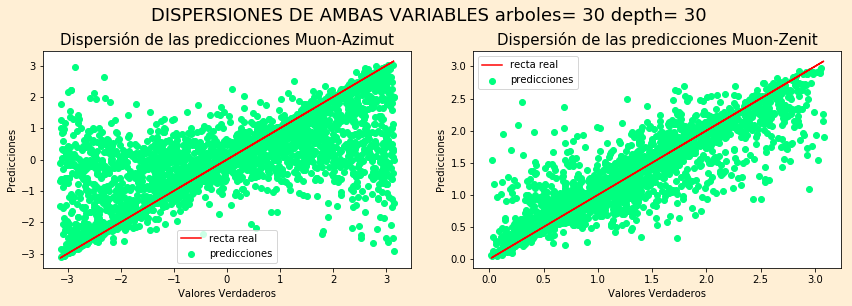

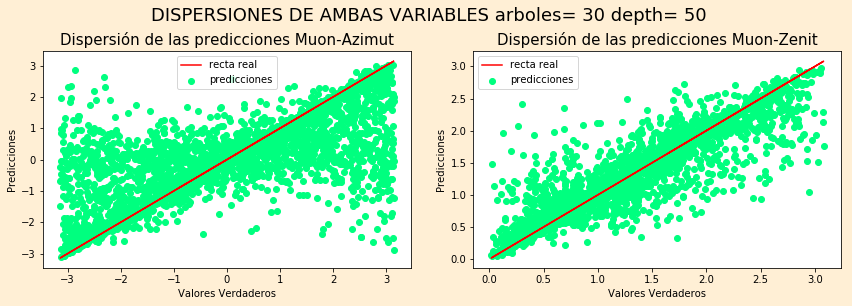

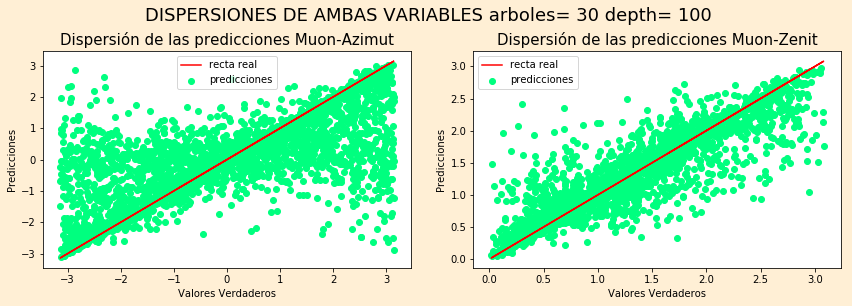

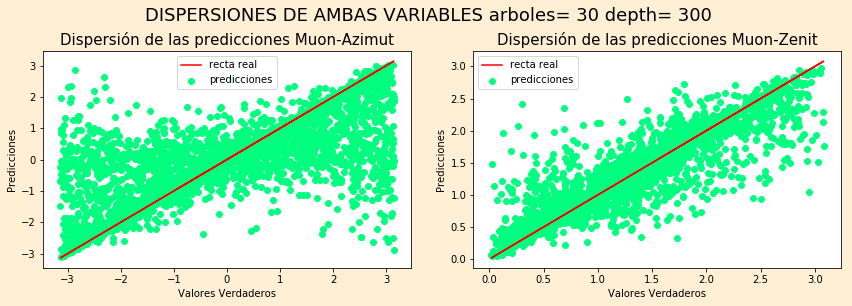

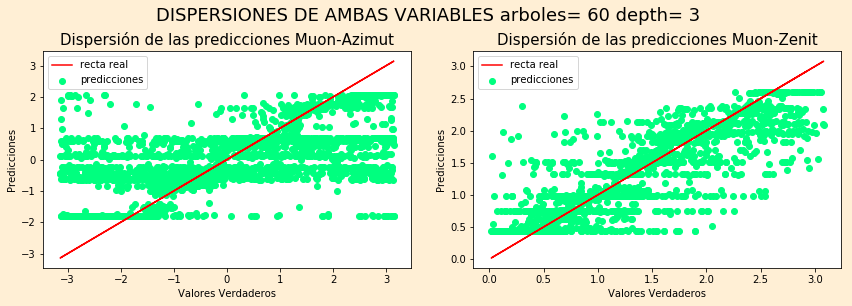

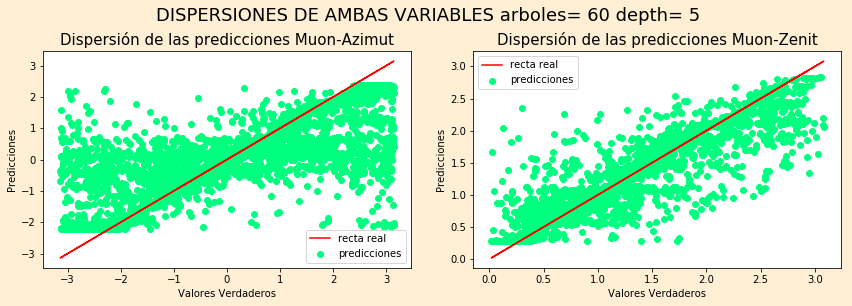

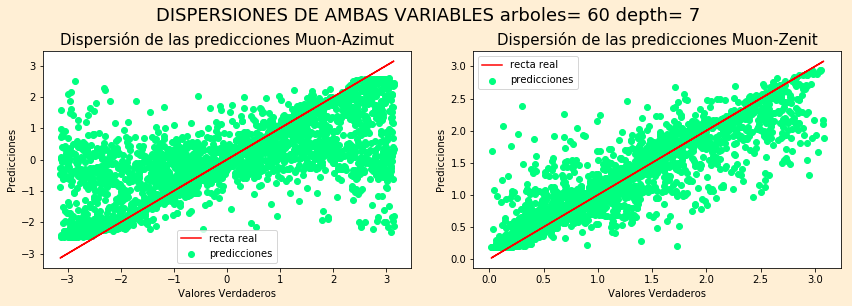

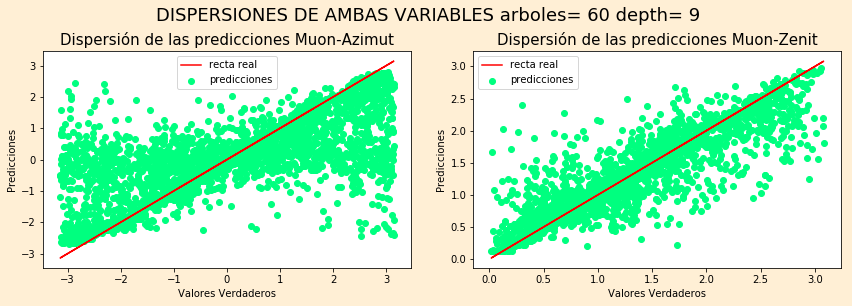

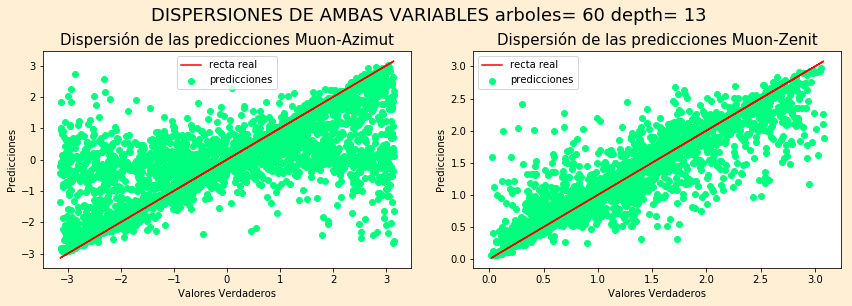

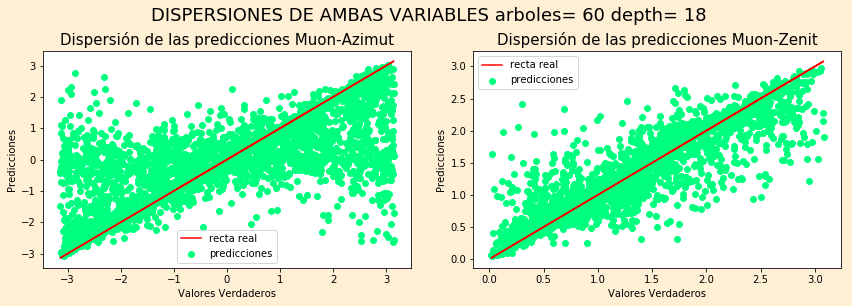

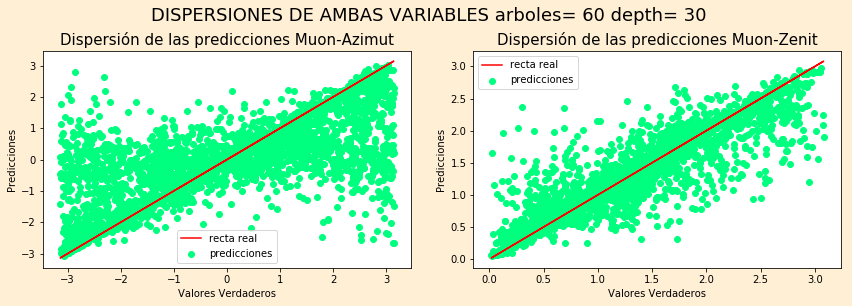

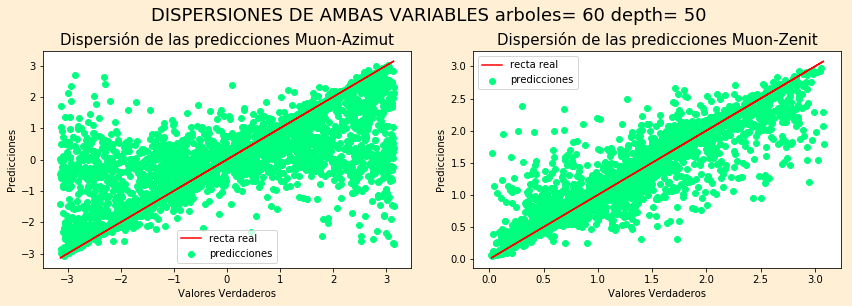

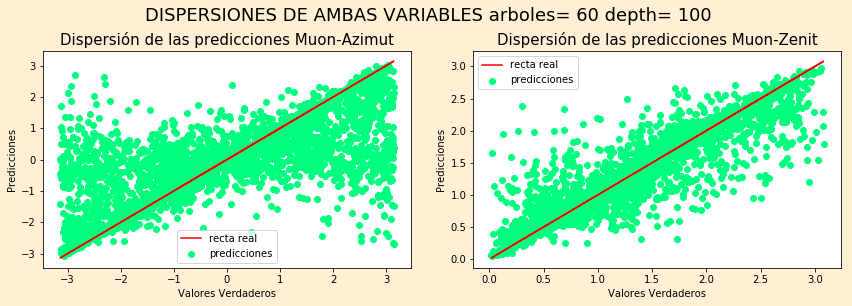

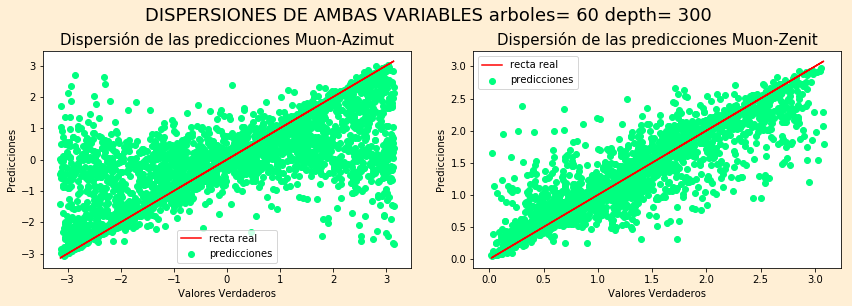

In [172]:
#Visualizando para diferentes "depths" y diferente # de árboles
#arboles = [5,10]
#depths = [3,5,7]

arboles = [5,10,15,20,30,60]
depths = [3,5,7,9,13,18,30,50,100,300]
mets = []

for i in arboles:
    for j in depths:
        graf_morf(i,j,10)

In [173]:
#Observando los errores para las diferentes pruebas del Random Forest Regressor
columnas = ['Variable','#Arboles','Depth','MAE','MSE','RMSE','MAPE','MAXE']
results = pd.DataFrame(mets, columns=columnas)
results

Variable  #Arboles  Depth       MAE       MSE      RMSE        MAPE  \
0     Azimut         5      3  0.945439  1.800810  1.341943  137.311722   
1      Zenit         5      3  0.221589  0.117192  0.342333   39.122649   
2     Azimut         5      5  0.868260  1.693877  1.301490  110.188538   
3      Zenit         5      5  0.191665  0.101377  0.318397   30.805736   
4     Azimut         5      7  0.847639  1.716524  1.310162  104.097812   
5      Zenit         5      7  0.186304  0.099420  0.315309   27.866052   
6     Azimut         5      9  0.856120  1.814798  1.347144  107.053171   
7      Zenit         5      9  0.185466  0.100558  0.317109   26.238181   
8     Azimut         5     13  0.877297  1.946263  1.395085  112.381835   
9      Zenit         5     13  0.191007  0.105878  0.325390   26.404373   
10    Azimut         5     18  0.900096  2.010762  1.418014  127.624177   
11     Zenit         5     18  0.193596  0.107811  0.328346   26.571246   
12    Azimut         5     30  0.900266  2.023130  1.422368  116.998528   
13     Zenit         5     30  0.194278  0.109081  0.330274   26.954459   
14    Azimut         5     50  0.898572  2.033220  1.425910  116.891270   
15     Zenit         5     50  0.193821  0.108730  0.329742   26.633810   
16    Azimut         5    100  0.898572  2.033220  1.425910  116.891270   
17     Zenit         5    100  0.193821  0.108730  0.329742   26.633810   
18    Azimut         5    300  0.898572  2.033220  1.425910  116.891270   
19     Zenit         5    300  0.193821  0.108730  0.329742   26.633810   
20    Azimut        10      3  0.944169  1.791493  1.338467  137.535067   
21     Zenit        10      3  0.223455  0.117922  0.343397   39.202854   
22    Azimut        10      5  0.856622  1.670261  1.292386  109.854215   
23     Zenit        10      5  0.188218  0.099554  0.315521   30.664578   
24    Azimut        10      7  0.837224  1.677268  1.295094   87.737011   
25     Zenit        10      7  0.181282  0.095584  0.309167   27.767864   
26    Azimut        10      9  0.832638  1.727706  1.314422   86.822078   
27     Zenit        10      9  0.180478  0.097165  0.311713   26.206162   
28    Azimut        10     13  0.849204  1.810996  1.345733  108.422347   
29     Zenit        10     13  0.182064  0.098673  0.314123   25.914354   
..       ...       ...    ...       ...       ...       ...         ...   
90    Azimut        30     18  0.825314  1.708659  1.307157   96.067441   
91     Zenit        30     18  0.175862  0.093394  0.305604   25.201027   
92    Azimut        30     30  0.823328  1.699258  1.303556   91.511292   
93     Zenit        30     30  0.176292  0.094236  0.306979   25.350564   
94    Azimut        30     50  0.826932  1.710059  1.307692   91.578918   
95     Zenit        30     50  0.176669  0.094384  0.307220   25.237294   
96    Azimut        30    100  0.826932  1.710059  1.307692   91.578918   
97     Zenit        30    100  0.176669  0.094384  0.307220   25.237294   
98    Azimut        30    300  0.826932  1.710059  1.307692   91.578918   
99     Zenit        30    300  0.176669  0.094384  0.307220   25.237294   
100   Azimut        60      3  0.932141  1.783200  1.335365  146.331080   
101    Zenit        60      3  0.221233  0.116471  0.341278   39.069385   
102   Azimut        60      5  0.845175  1.648559  1.283962  104.163703   
103    Zenit        60      5  0.186246  0.098260  0.313464   30.682102   
104   Azimut        60      7  0.823176  1.622577  1.273804   92.397657   
105    Zenit        60      7  0.176933  0.093279  0.305416   27.281208   
106   Azimut        60      9  0.814155  1.631332  1.277236   82.403145   
107    Zenit        60      9  0.173620  0.092308  0.303823   25.770981   
108   Azimut        60     13  0.818798  1.665307  1.290468   92.780383   
109    Zenit        60     13  0.172967  0.091920  0.303183   24.948997   
110   Azimut        60     18  0.821452  1.684325  1.297815   91.970454   
111    Zenit        60     18

### Comparando las metricas de error para la máxima profundidad y número árboles

In [174]:
max = results['Depth'].max()
res_az = results[results['Variable']=="Azimut"]
res_ze = results[results['Variable']=="Zenit"]

In [175]:
res_az[res_az['Depth']==max]

Variable  #Arboles  Depth       MAE       MSE      RMSE        MAPE  \
18    Azimut         5    300  0.898572  2.033220  1.425910  116.891270   
38    Azimut        10    300  0.859995  1.861281  1.364288  105.337030   
58    Azimut        15    300  0.837053  1.766914  1.329253  107.686378   
78    Azimut        20    300  0.833828  1.743793  1.320528  105.069370   
98    Azimut        30    300  0.826932  1.710059  1.307692   91.578918   
118   Azimut        60    300  0.823517  1.687944  1.299209   90.202953   

         MAXE  
18   6.102583  
38   6.129964  
58   6.096132  
78   6.045820  
98   6.040176  
118  5.823437

In [176]:
res_ze[res_ze['Depth']==max]

Variable  #Arboles  Depth       MAE       MSE      RMSE       MAPE  \
19     Zenit         5    300  0.193821  0.108730  0.329742  26.633810   
39     Zenit        10    300  0.183982  0.100387  0.316839  25.830777   
59     Zenit        15    300  0.182352  0.098606  0.314016  25.573351   
79     Zenit        20    300  0.179715  0.096892  0.311274  25.444137   
99     Zenit        30    300  0.176669  0.094384  0.307220  25.237294   
119    Zenit        60    300  0.173966  0.092658  0.304398  25.054159   

         MAXE  
19   1.961540  
39   2.174974  
59   2.216742  
79   2.161267  
99   2.111895  
119  2.076262

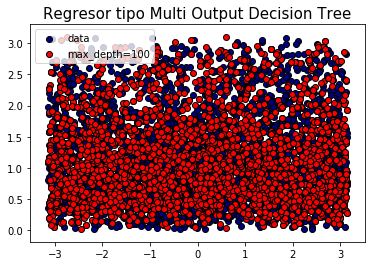

In [25]:
#Graficando los resultados de "cierta forma" para comparar
plt.figure()
plt.scatter(Y_test['muon_azimut'], Y_test['muon_zenit'], c="navy",edgecolor="black", label="data")
plt.scatter(y_predict[:,0],y_predict[:,1], c="red", edgecolor="black", label="max_depth="+str(md))
plt.title("Regresor tipo Multi Output Decision Tree", size=15)
plt.legend(loc="best")
plt.show()

In [178]:
errores = Y_test - y_predict

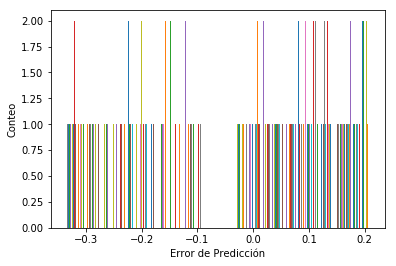

In [179]:
#Graficando la distribución de los errores
plt.hist(errores, bins="auto")
plt.xlabel("Error de Predicción")
_ = plt.ylabel("Conteo")